# 7/09/2022

# Computer Vision

# DTM Test Controller

# Muallif: Farrux Sotivoldiyev

**`Kerakli kutubxonalar`**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob

**`Talabalarning titullari turgan path va bosh titul turgan path`**

In [2]:
titul_path = "DATA/DTM_varaqalar/Talabalar/"
main_titul_path = "DATA/DTM_varaqalar/DTM_varaqasi_main.jpg"

**`O'ziga path olib ichidagi barcha rasmlarni o'qib talabalarning ismi va titul varaqalarini qaytaruvchi funksiya`**

In [3]:
# ismni faylning nomidan oladi
def get_load_dataset(path):
    titullar = []
    ismlar = []
    for i in glob.glob(os.path.join(path,"*")):
        titul = plt.imread(i)
        titul = cv2.resize(titul,(1080,720))
        titullar.append(titul)
        
        for j in i.split("\\"):
            if j.find(".")!=-1:
                ismlar.append(j.split(".")[0])
        
    return ismlar,titullar

**`Ma'lumotlar o'qilib o'zgaruvchilarga yozildi`**

In [4]:
load_dataset = get_load_dataset(titul_path)
main_titul = cv2.resize(plt.imread(main_titul_path),(1080,720))

**`Asosiy titul varaqasi`**

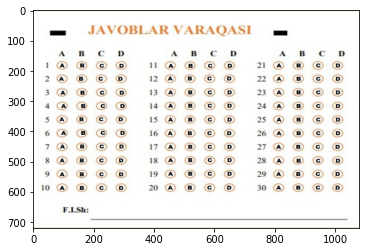

In [29]:
plt.imshow(main_titul)

**`Talabaning belgilagan titul varaqasi`**

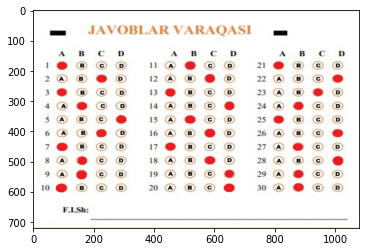

In [32]:
plt.imshow(load_dataset[1][0])

**`Talabaning titul varaqasini olib uning javoblarini qaytaruvchi funksiya`**

In [5]:
def checking(talaba_varaqasi): 
    range_1 = np.array([200,0,0])
    range_2 = np.array([255,100,100])
    maska = cv2.inRange(talaba_varaqasi,range_1,range_2)
    
    main_titul_copy = main_titul.copy()
    main_titul_copy[maska==0]=0
    
    talaba_javoblari = []
    qatorlar = []
    tayyor_talaba_tituli = {"test_1" : {},"test_2" : {},"test_3" : {},"test_4" : {},"test_5" : {},"test_6" : {},
         "test_7" : {},"test_8" : {},"test_9" : {},"test_10" : {},"test_11" : {},"test_12" : {},
         "test_13" : {},"test_14" : {},"test_15" : {},"test_16" : {},"test_17" : {},"test_18" : {},
         "test_19" : {},"test_20" : {},"test_21" : {},"test_22" : {},"test_23" : {},"test_24" : {},
         "test_25" : {},"test_26" : {},"test_27" : {},"test_28" : {},"test_29" : {},"test_30" : {}}
    
    for i in range(30):
        for j in range(168,600,45):
            if i<10:
                qatorlar.append(main_titul_copy[j:j+28,75:310])
            elif i<20:
                qatorlar.append(main_titul_copy[j:j+28,434:667])
            else:
                qatorlar.append(main_titul_copy[j:j+28,794:1024])

    for i in range(30):
        test = f"test_{i+1}"
        sanoq = 1
        for j in range(5,225,65):
            if sanoq==1:
                tayyor_talaba_tituli[test]["A"] = qatorlar[i][5:,j:j+30]
            elif sanoq==2:
                tayyor_talaba_tituli[test]["B"] = qatorlar[i][5:,j:j+30]
            elif sanoq==3:
                tayyor_talaba_tituli[test]["C"] = qatorlar[i][5:,j:j+30]
            elif sanoq==4:
                tayyor_talaba_tituli[test]["D"] = qatorlar[i][5:,j:j+30]
            sanoq += 1
            
    for javoblar in tayyor_talaba_tituli:
        for variantlar in tayyor_talaba_tituli[javoblar]:
            if np.sum(tayyor_talaba_tituli[javoblar][variantlar])!=0:
                talaba_javoblari.append(variantlar)
                break
                
    return talaba_javoblari

**`Papkadan o'qilgan barcha titul varaqalari va to'g'ri javoblarni olib ularni tekshirib reytingini qaytaruvchi funksiya`**

In [19]:
def dtm_test_checker(names_and_dtm_titles,correct_answers):
    talabalar_reytingi = {}
    for student in range(len(names_and_dtm_titles[1])):
        talaba_javobi = checking(names_and_dtm_titles[1][student])
        togri_javoblar_soni = 0
        
        for i in range(30):
            if correct_answers[i]==talaba_javobi[i]:
                togri_javoblar_soni += 1
                
        natija_foizda = np.round((100*togri_javoblar_soni)/30,2)
        talabalar_reytingi[names_and_dtm_titles[0][student]] = (togri_javoblar_soni,natija_foizda)
        
    return talabalar_reytingi         

In [20]:
correct_answers = ['A','A','A','A','A','C','A','D','B','C','A','C','C','A','D','C','A','D','A','C','A','C','A','B','C','C','A','C','B','C']

In [21]:
result = dtm_test_checker(load_dataset,correct_answers)

**`REYTING`**

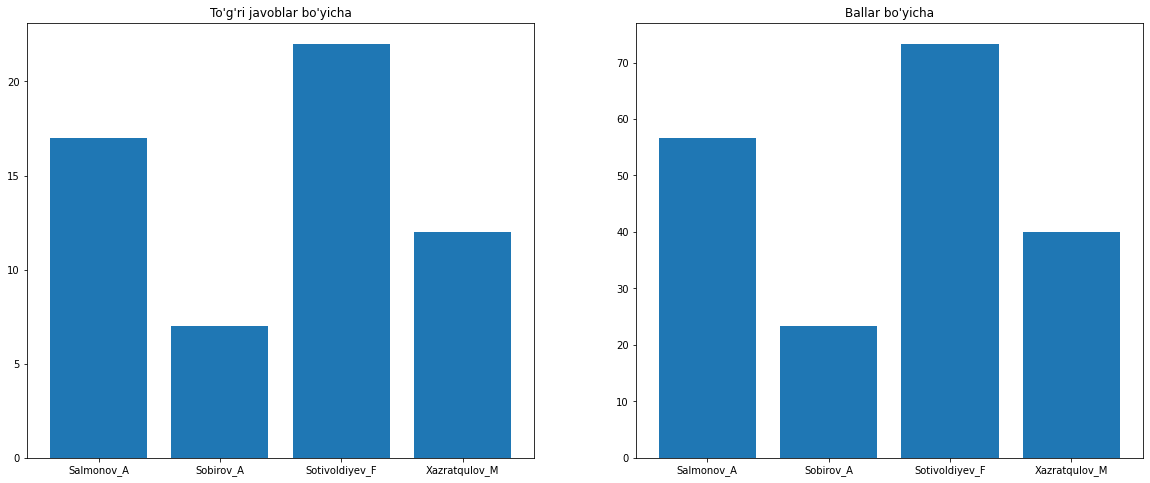

In [34]:
y1 = []; x1 = []; y2 = []; x2 = []
for i in result:
    y1.append(result[i][0]); x1.append(i)
    y2.append(result[i][1]); x2.append(i)
    
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("To'g'ri javoblar bo'yicha")
plt.bar(x1,y1)

plt.subplot(122)
plt.title("Ballar bo'yicha")
plt.bar(x2,y2)
plt.show()